In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [3]:
train_df = pd.read_csv("twitter_training.csv")

In [3]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# Check for missing values in the training dataset
train_df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [5]:
train_df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

In [6]:
sentiment_mapping = {
    'Positive': 4,
    'Negative': 0,
    'Neutral': 2,
    'Irrelevant': -1
}

# Map the sentiment values to a new column in train_df
train_df['sentiment_value'] = train_df['Sentiment'].map(sentiment_mapping)

In [7]:
train_df.to_csv('train_data.csv', index=False)  # Overwrites the original file

In [8]:
train_df.head()

,ID,Entity,Sentiment,Text,sentiment_value
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,4
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,4
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,4
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,4
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,4


In [9]:
df = pd.DataFrame(train_df)

In [10]:
# Replace NaN values with an empty string
df['Text'] = df['Text'].fillna('')

In [11]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])

In [12]:
# Mapping sentiments to numeric values
sentiment_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0, 'Irrelevant': -1}
y = df['Sentiment'].map(sentiment_mapping)

In [13]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Training a Logistic Regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter to 200 or more
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model
logi_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {logi_accuracy}")

Logistic Regression Accuracy: 0.7912566110999532


In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.84      0.68      0.75      2661
           0       0.76      0.88      0.82      4471
           1       0.80      0.74      0.77      3551
           2       0.79      0.81      0.80      4254

    accuracy                           0.79     14937
   macro avg       0.80      0.78      0.79     14937
weighted avg       0.79      0.79      0.79     14937



<Figure size 600x400 with 0 Axes>

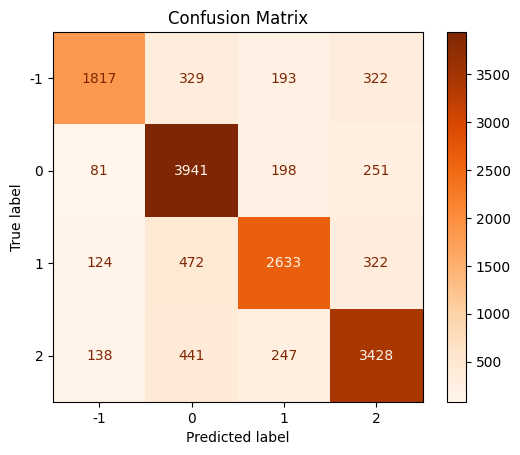

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Oranges", values_format="d")
plt.title("Confusion Matrix")
plt.show()


In [17]:
# Pickle the trained model and vectorizer
with open('keyword_sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('keyword_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Keyword sentiment model and vectorizer have been pickled.")

Keyword sentiment model and vectorizer have been pickled.


In [18]:
# Load the pickled model and vectorizer
with open('keyword_sentiment_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('keyword_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)


In [19]:
# Function for keyword analysis
def keyword_analysis(keyword):
    filtered_reviews = df[df['text'].str.contains(keyword, case=False)]
    
    if filtered_reviews.empty:
        print(f"No reviews found for keyword '{keyword}'.")
        return
    
    # Predicting sentiment for filtered reviews
    filtered_vector = vectorizer.transform(filtered_reviews['text'])
    filtered_sentiment = model.predict(filtered_vector)

In [20]:
# Function for keyword analysis
def keyword_analysis(keyword):
    # Filter reviews containing the keyword, making a copy to avoid SettingWithCopyWarning
    filtered_reviews = df[df['Text'].str.contains(keyword, case=False)].copy()  
    
    if filtered_reviews.empty:
        print(f"No reviews found for keyword '{keyword}'.")
        return

    # Check for NaN values in the 'Text' column (optional)
    filtered_reviews = filtered_reviews[filtered_reviews['Text'].notna()]

    # Predicting sentiment for filtered reviews
    filtered_vector = vectorizer.transform(filtered_reviews['Text'])
    filtered_sentiment = model.predict(filtered_vector)

    # Safely assign predicted sentiment using .loc
    filtered_reviews.loc[:, 'predicted_sentiment'] = filtered_sentiment
    filtered_reviews['predicted_sentiment'] = filtered_reviews['predicted_sentiment'].map({
        2: 'Positive',
        1: 'Neutral',
        0: 'Negative',
        -1: 'Irrelevant'
    })

    # Plot the sentiment distribution
    sentiment_counts = filtered_reviews['predicted_sentiment'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Sentiment Analysis for Keyword: {keyword}')
    plt.axis('equal')
    plt.show()
    
    # return filtered_reviews

Enter a keyword for sentiment analysis:  game


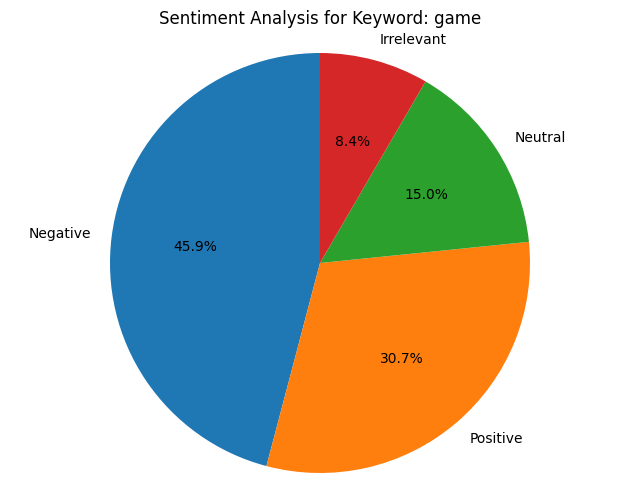

In [26]:
# Input for keyword analysis
keyword = input("Enter a keyword for sentiment analysis: ")
keyword_analysis(keyword)